In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
E = 210 * 10**3
b = 35.1
d = 1.2
I = b * d**3 / 12
L = 20

In [3]:
theta = np.linspace(0.001, np.pi/4, 100)

k = np.zeros(100)
phi = np.zeros(100)
f_k = np.zeros(100)
f_kphi = np.zeros(100)
y = np.zeros(100)
p = np.zeros(100)
e_k = np.zeros(100)
e_kphi = np.zeros(100)
deltav = np.zeros(100)
deltah = np.zeros(100)
delta1 = np.zeros(100)

In [4]:
for i in range(100):
    k[i] = np.sqrt((1 + np.sin(theta[i])) / 2)
    phi[i] = np.arcsin(1 / (k[i] * np.sqrt(2)))
    
    f_k_func = lambda x: 1 / np.sqrt(1 - (k[i]**2) * (np.sin(x))**2)
    f_k[i], _ = quad(f_k_func, 0, np.pi/2)
    
    f_kphi_func = lambda x: 1 / np.sqrt(1 - (k[i]**2) * (np.sin(x))**2)
    f_kphi[i], _ = quad(f_kphi_func, 0, phi[i])
    
    y[i] = (f_k[i] - f_kphi[i])**2
    p[i] = y[i] * E * I / (L**2)
    
    e_k_func = lambda x: np.sqrt(1 - (k[i]**2) * (np.sin(x))**2)
    e_k[i], _ = quad(e_k_func, 0, np.pi/2)
    
    e_kphi_func = lambda x: np.sqrt(1 - (k[i]**2) * (np.sin(x))**2)
    e_kphi[i], _ = quad(e_kphi_func, 0, phi[i])
    
    deltav[i] = L * (1 - (np.sqrt(4 / y[i])) * (e_k[i] - e_kphi[i]))
    deltah[i] = L * (1 - np.sqrt(2 * theta[i] / y[i]))
    
    delta1[i] = p[i] * L**3 / (3 * E * I)


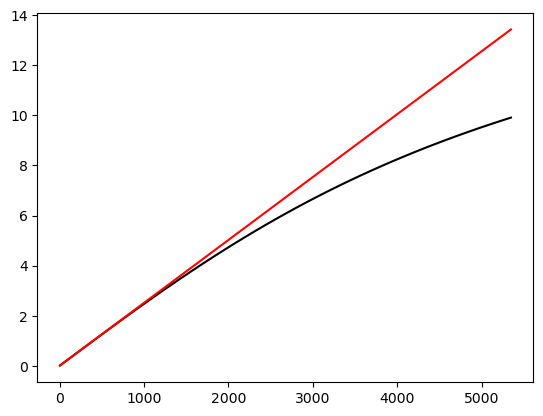

In [5]:
plt.plot(p, deltav, 'k-')
plt.plot(p, delta1, 'r-')

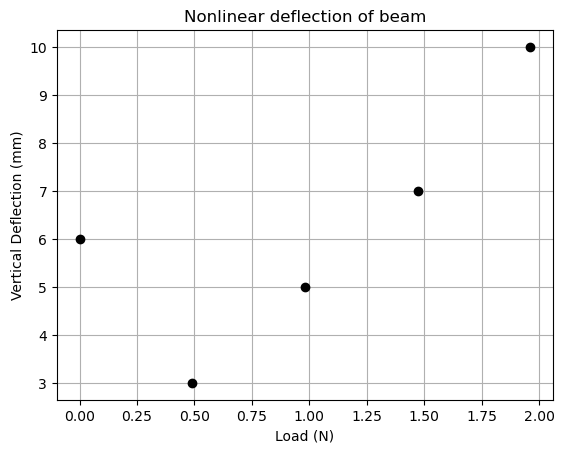

In [6]:
p1 = np.array([0, 50, 100, 150, 200]) * 10**-3 * 9.81
delta2 = np.array([6, 3,5, 7, 10])
plt.plot(p1, delta2, 'ko')
plt.xlabel('Load (N)')
plt.ylabel('Vertical Deflection (mm)')
plt.title('Nonlinear deflection of beam')
plt.grid(True)
plt.show()